## Importing Important library

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Loading Data

In [2]:
data = pd.read_csv(r"C:\Users\hp\Desktop\Avocados classification\avocado.csv")

In [3]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## Data preparation 

In [4]:
data.drop(data.columns[0], axis=1, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


## Visualization

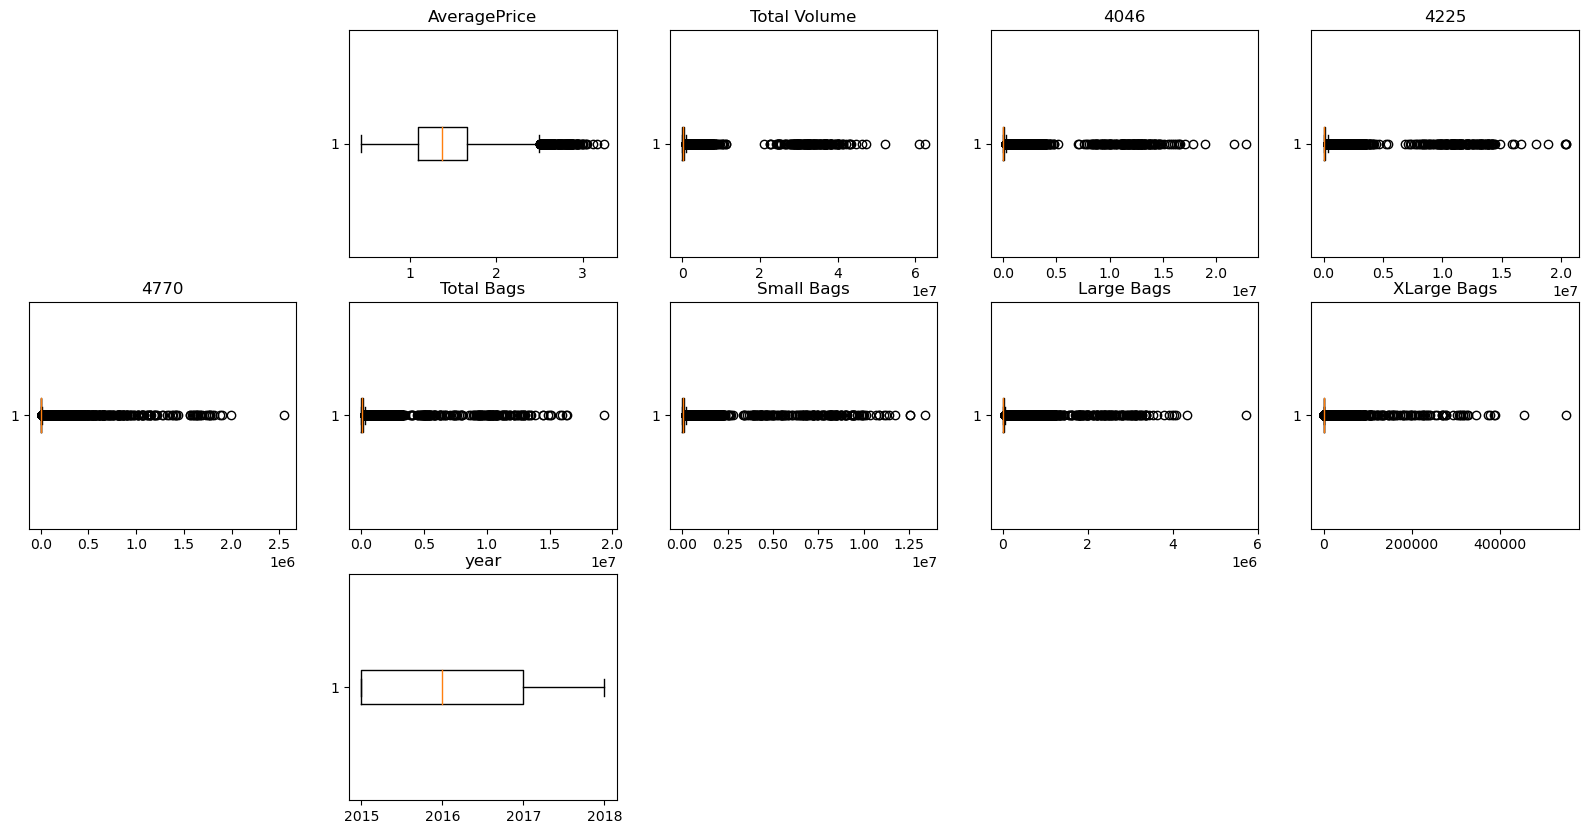

In [6]:
plt.figure(figsize=(20, 10))

for i in range(len(data.columns)):
    if data.dtypes[i] != 'object':
        plt.subplot(3, 5, i + 1)
        plt.boxplot(data[data.columns[i]], vert=False)
        plt.title(data.columns[i])
        
plt.show()

## Preprocessing 

In [7]:
data.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

## Encoding

In [8]:
def get_uniques(df, columns):
    return {column: list(df[column].unique()) for column in columns}

In [9]:
categorical_columns = ['region', 'Date', 'type']

get_uniques(data, categorical_columns)

{'region': ['Albany',
  'Atlanta',
  'BaltimoreWashington',
  'Boise',
  'Boston',
  'BuffaloRochester',
  'California',
  'Charlotte',
  'Chicago',
  'CincinnatiDayton',
  'Columbus',
  'DallasFtWorth',
  'Denver',
  'Detroit',
  'GrandRapids',
  'GreatLakes',
  'HarrisburgScranton',
  'HartfordSpringfield',
  'Houston',
  'Indianapolis',
  'Jacksonville',
  'LasVegas',
  'LosAngeles',
  'Louisville',
  'MiamiFtLauderdale',
  'Midsouth',
  'Nashville',
  'NewOrleansMobile',
  'NewYork',
  'Northeast',
  'NorthernNewEngland',
  'Orlando',
  'Philadelphia',
  'PhoenixTucson',
  'Pittsburgh',
  'Plains',
  'Portland',
  'RaleighGreensboro',
  'RichmondNorfolk',
  'Roanoke',
  'Sacramento',
  'SanDiego',
  'SanFrancisco',
  'Seattle',
  'SouthCarolina',
  'SouthCentral',
  'Southeast',
  'Spokane',
  'StLouis',
  'Syracuse',
  'Tampa',
  'TotalUS',
  'West',
  'WestTexNewMexico'],
 'Date': ['2015-12-27',
  '2015-12-20',
  '2015-12-13',
  '2015-12-06',
  '2015-11-29',
  '2015-11-22',
  '20

In [10]:
ordinal_features = ['Date']

nominal_features = ['region']

target_column = 'type'

In [11]:
date_ordering = sorted(data['Date'].unique())

In [12]:
def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df


def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column])
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)
    return df

In [13]:
data = ordinal_encode(data, 'Date', date_ordering)

In [14]:
data = onehot_encode(data, 'region')

In [15]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,...,0,0,0,0,0,0,0,0,0,1
18245,160,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,...,0,0,0,0,0,0,0,0,0,1
18246,159,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,...,0,0,0,0,0,0,0,0,0,1
18247,158,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
label_encoder = LabelEncoder()
data[target_column] = label_encoder.fit_transform(data[target_column])
X = data.drop(target_column, axis=1).values
y = data[target_column].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

## Training the model

In [22]:
model_lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(1, X_train.shape[1]), activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

In [27]:
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train_lstm, y_train, batch_size=32, epochs=100, validation_data=(X_test_lstm, y_test))

Epoch 1/100
457/457 [==============================] - 3s 4ms/step - loss: 0.2909 - accuracy: 0.8932 - val_loss: 0.2924 - val_accuracy: 0.8871
Epoch 2/100
457/457 [==============================] - 1s 3ms/step - loss: 0.2787 - accuracy: 0.8988 - val_loss: 0.2908 - val_accuracy: 0.9066
Epoch 3/100
457/457 [==============================] - 2s 3ms/step - loss: 0.2922 - accuracy: 0.8967 - val_loss: 0.2844 - val_accuracy: 0.9126
Epoch 4/100
457/457 [==============================] - 1s 3ms/step - loss: 0.2841 - accuracy: 0.8997 - val_loss: 0.2720 - val_accuracy: 0.9068
Epoch 5/100
457/457 [==============================] - 2s 4ms/step - loss: 0.2665 - accuracy: 0.9068 - val_loss: 2.5966 - val_accuracy: 0.9195
Epoch 6/100
457/457 [==============================] - 2s 3ms/step - loss: 0.3027 - accuracy: 0.8873 - val_loss: 0.2923 - val_accuracy: 0.9011
Epoch 7/100
457/457 [==============================] - 2s 3ms/step - loss: 0.2909 - accuracy: 0.8902 - val_loss: 0.2859 - val_accuracy: 0.8934

Epoch 58/100
457/457 [==============================] - 2s 4ms/step - loss: 0.2687 - accuracy: 0.9022 - val_loss: 0.2698 - val_accuracy: 0.9003
Epoch 59/100
457/457 [==============================] - 2s 4ms/step - loss: 0.2558 - accuracy: 0.9146 - val_loss: 0.2561 - val_accuracy: 0.9082
Epoch 60/100
457/457 [==============================] - 2s 4ms/step - loss: 0.2868 - accuracy: 0.9043 - val_loss: 0.2799 - val_accuracy: 0.8945
Epoch 61/100
457/457 [==============================] - 2s 3ms/step - loss: 0.2806 - accuracy: 0.8989 - val_loss: 0.2812 - val_accuracy: 0.9132
Epoch 62/100
457/457 [==============================] - 2s 4ms/step - loss: 0.2693 - accuracy: 0.9019 - val_loss: 0.2634 - val_accuracy: 0.9036
Epoch 63/100
457/457 [==============================] - 2s 4ms/step - loss: 0.2641 - accuracy: 0.9050 - val_loss: 0.2564 - val_accuracy: 0.9082
Epoch 64/100
457/457 [==============================] - 2s 4ms/step - loss: 0.2479 - accuracy: 0.9148 - val_loss: 0.2341 - val_accuracy:

## Model evaluation

In [28]:
y_pred_lstm = np.argmax(model_lstm.predict(X_test_lstm), axis=1)
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print("LSTM Accuracy:", accuracy_lstm)

115/115 [==============================] - 0s 2ms/step
LSTM Accuracy: 0.9389041095890411


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lstm))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1820
           1       0.98      0.89      0.94      1830

    accuracy                           0.94      3650
   macro avg       0.94      0.94      0.94      3650
weighted avg       0.94      0.94      0.94      3650

